In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl,np,pd,sklearn,tf,keras:
    print(module.__name__,module.__version__)

tf.test.is_gpu_available()

2.0.0-dev20191002
sys.version_info(major=3, minor=7, micro=4, releaselevel='final', serial=0)
matplotlib 3.1.1
numpy 1.17.2
pandas 0.25.1
sklearn 0.21.3
tensorflow 2.0.0-dev20191002
tensorflow_core.keras 2.2.4-tf
Instructions for updating:
Use `tf.config.experimental.list_physical_devices('GPU')` instead.


False

In [2]:
# 在打开网址时出现和ssl证书相关的问题时，需要加上这句话
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
# 采用房屋预测模型数据
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
from sklearn.model_selection import train_test_split

x_train_all,x_test,y_train_all,y_test = train_test_split(
    housing.data,housing.target,random_state = 7)
x_train,x_valid,y_train,y_valid = train_test_split(
    x_train_all,y_train_all,random_state = 11)
print(x_train.shape,y_train.shape)
print(x_valid.shape,y_valid.shape)
print(x_test.shape,y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [4]:
# 进行数据归一化处理
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.fit_transform(x_valid)
x_test_scaled = scaler.fit_transform(x_test)

# 我们把layer当做方法来使用

In [5]:
layer = tf.keras.layers.Dense(100) # 可以不指定input_shape,会自动推断
layer = tf.keras.layers.Dense(100,input_shape=(None,5)) # 也可以指定shape
layer(tf.zeros([10,5])) # 把layer当做函数来调用，返回是一个[10,100]的矩阵

<tf.Tensor: shape=(10, 100), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.,

In [6]:
layer.variables # 查看所有的变量

[<tf.Variable 'dense_1/kernel:0' shape=(5, 100) dtype=float32, numpy=
 array([[ 1.00356027e-01,  4.56546992e-02, -1.72228843e-01,
         -7.52221942e-02,  9.67709273e-02,  9.42273885e-02,
          2.32769772e-01,  1.35749385e-01,  2.09656343e-01,
          3.79822701e-02, -1.01170108e-01, -1.25077337e-01,
         -1.69771031e-01,  1.05270460e-01, -1.51080877e-01,
          1.92415342e-01, -1.72777116e-01,  1.84960321e-01,
         -2.29817659e-01, -2.38899648e-01,  1.79448321e-01,
          8.10194016e-03,  1.58651754e-01,  1.87321559e-01,
         -2.01339364e-01, -1.16378561e-01, -1.77193284e-01,
         -7.27678984e-02,  6.56717271e-02,  1.58430412e-01,
          2.38786981e-01,  1.14197284e-02, -3.58046591e-03,
          5.90126067e-02,  1.57732919e-01,  4.54342365e-03,
         -9.91464108e-02, -4.22245264e-02, -6.22431934e-02,
         -1.02934614e-01,  1.78220466e-01, -1.35622054e-01,
          6.97305650e-02, -1.42382622e-01,  3.42294574e-04,
          1.09758362e-01,  1.9

In [7]:
layer.trainable_variables # 可训练的变量

[<tf.Variable 'dense_1/kernel:0' shape=(5, 100) dtype=float32, numpy=
 array([[ 1.00356027e-01,  4.56546992e-02, -1.72228843e-01,
         -7.52221942e-02,  9.67709273e-02,  9.42273885e-02,
          2.32769772e-01,  1.35749385e-01,  2.09656343e-01,
          3.79822701e-02, -1.01170108e-01, -1.25077337e-01,
         -1.69771031e-01,  1.05270460e-01, -1.51080877e-01,
          1.92415342e-01, -1.72777116e-01,  1.84960321e-01,
         -2.29817659e-01, -2.38899648e-01,  1.79448321e-01,
          8.10194016e-03,  1.58651754e-01,  1.87321559e-01,
         -2.01339364e-01, -1.16378561e-01, -1.77193284e-01,
         -7.27678984e-02,  6.56717271e-02,  1.58430412e-01,
          2.38786981e-01,  1.14197284e-02, -3.58046591e-03,
          5.90126067e-02,  1.57732919e-01,  4.54342365e-03,
         -9.91464108e-02, -4.22245264e-02, -6.22431934e-02,
         -1.02934614e-01,  1.78220466e-01, -1.35622054e-01,
          6.97305650e-02, -1.42382622e-01,  3.42294574e-04,
          1.09758362e-01,  1.9

In [8]:
help(layer) # 使用help来查看layer类的其他信息

Help on Dense in module tensorflow.python.keras.layers.core object:

class Dense(tensorflow.python.keras.engine.base_layer.Layer)
 |  Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`).
 |  
 |  Note: If the input to the layer has a rank greater than 2, then
 |  it is flattened prior to the initial dot product with `kernel`.
 |  
 |  Example:
 |  
 |  ```python
 |  # as first layer in a sequential model:

In [18]:
# 对于像‘relu’这样没有参数的layer，可以很方便的使用lambda表达式来定义
# tf.nn.softplus : log(1+e^x):对输入的的x都进行softplus操作
customized_softplus = keras.layers.Lambda(lambda x : tf.nn.softplus(x)) 
print(customized_softplus([-10.,-5.,0.,5.,10.]))

tf.Tensor([4.5417706e-05 6.7153489e-03 6.9314718e-01 5.0067153e+00 1.0000046e+01], shape=(5,), dtype=float32)


In [19]:
# 自定义dense layer
class CustomizedDenseLayer(keras.layers.Layer):
    def __init__(self,units,activation=None, **kwargs):
        self.units = units # 要输出的维度
        self.activation = keras.layers.Activation(activation)
        super(CustomizedDenseLayer,self).__init__(**kwargs)
    
    def build(self,input_shape):
        """构建所需要的权重参数"""
        # x * w +b
        # input_shape : [None,a]
        self.kernel =  self.add_weight(name = 'kernel',
                                       shape = (input_shape[1],self.units),
                                        initializer = 'uniform',
                                       trainable = True)
        self.bias = self.add_weight(name = 'bias',
                                    shape = (self.units,),
                                    initializer = 'zeros',
                                    trainable = True)
        super(CustomizedDenseLayer,self).build(input_shape)
    
    def call(self,x):
        """完成正向计算"""
        output = x @ self.kernel + self.bias
        return self.activation(output)


model = keras.models.Sequential(
    [CustomizedDenseLayer(30,activation='relu',input_shape=x_train.shape[1:]),
     CustomizedDenseLayer(1),
     # customized_softplus 相当于keras.layers.Dense(1,activation='softplus')
     # customized_softplus 也相当于keras.layers.Dense(1),keras.layers.Activation('softplus'),
     customized_softplus,# 使用我们自定义的customized_softplus作为激活输出
    ])
model.summary()
    
model.compile(loss = "mean_squared_error",
              optimizer = 'sgd') # 看一下mean_squared_error和自定义的是否一致

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
customized_dense_layer_4 (Cu (None, 30)                270       
_________________________________________________________________
customized_dense_layer_5 (Cu (None, 1)                 31        
_________________________________________________________________
lambda_3 (Lambda)            (None, 1)                 0         
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [11]:
callbacks = [
        keras.callbacks.EarlyStopping(min_delta=1e-2,patience=5)
    ]

# 开始训练:使用归一化的数据
history = model.fit(x_train_scaled,y_train,epochs=10,
        validation_data=(x_valid_scaled,y_valid),
        callbacks=callbacks)

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 72us/sample - loss: 1.1107 - val_loss: 0.6336
Epoch 2/10
11610/11610 [==============================] - 0s 29us/sample - loss: 0.5514 - val_loss: 0.5361
Epoch 3/10
11610/11610 [==============================] - 0s 30us/sample - loss: 0.4858 - val_loss: 0.4807
Epoch 4/10
11610/11610 [==============================] - 0s 31us/sample - loss: 0.4590 - val_loss: 0.4521
Epoch 5/10
11610/11610 [==============================] - 0s 31us/sample - loss: 0.4480 - val_loss: 0.4452
Epoch 6/10
11610/11610 [==============================] - 0s 30us/sample - loss: 0.4428 - val_loss: 0.4272
Epoch 7/10
11610/11610 [==============================] - 0s 30us/sample - loss: 0.4272 - val_loss: 0.4703
Epoch 8/10
11610/11610 [==============================] - 0s 31us/sample - loss: 0.4340 - val_loss: 0.4221
Epoch 9/10
11610/11610 [==============================] - 0s 32us/sample - loss: 0.4148 - val_l

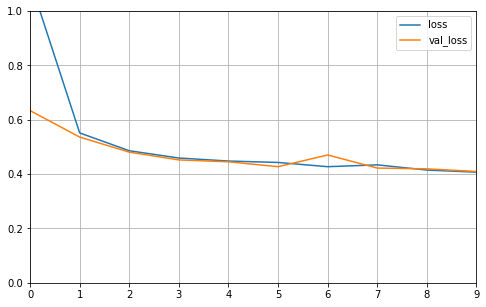

In [12]:
# 把值的变化过程打印出来
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()

plot_learning_curves(history)
   

In [13]:
model.evaluate(x_test_scaled,y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.4505402182423791